# Non-Uniform Grids

In [1]:
%matplotlib inline
import numpy as np
from findiff import FinDiff
import matplotlib.pyplot as plt

We define a function of one variable and its first derivative for this tutorial.

In [2]:
def f(x):
    return x * np.exp(-x**2)

def df_dx(x):
    return np.exp(-x**2) - 2*x**2*np.exp(-x**2)

It looks like this:

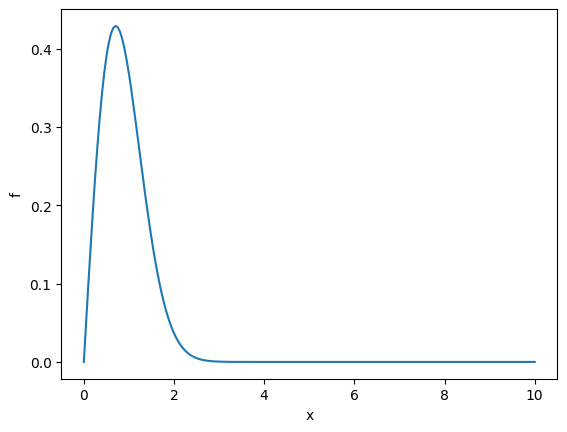

In [3]:
x_fine = np.linspace(0, 10, 200)
f_fine = f(x_fine)

plt.plot(x_fine, f_fine)
plt.xlabel("x")
plt.ylabel("f")
plt.show()

Let's make a coarse and a finer grid.

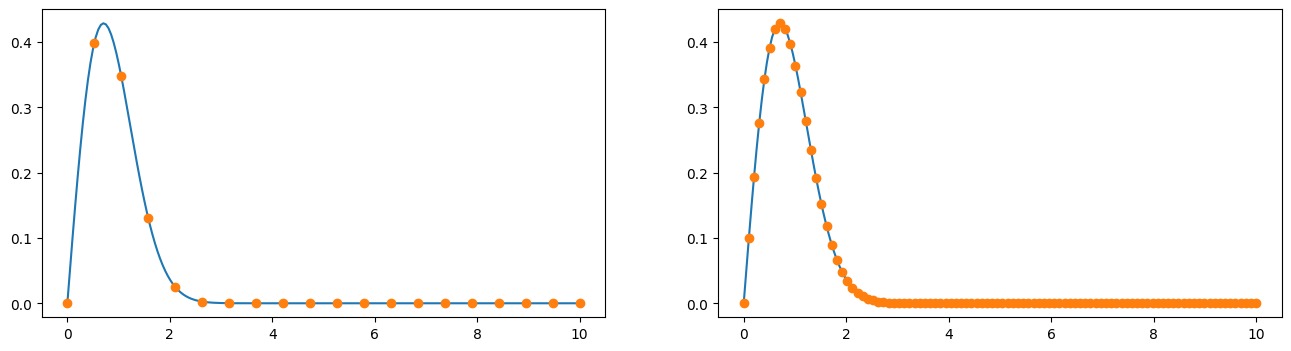

In [4]:
x1 = np.linspace(0, 10, 20)
x2 = np.linspace(0, 10, 100)
f1 = f(x1)
f2 = f(x2)

fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(x_fine, f_fine)
ax2.plot(x_fine, f_fine)
ax1.plot(x1, f1, 'o')
ax2.plot(x2, f2, 'o')
plt.show()

Obviously the coarser grid covers the function in the range $x \in [3, 10]$  quite well, but not so for $x<3$. Let's calculate the first derivative for both grids.

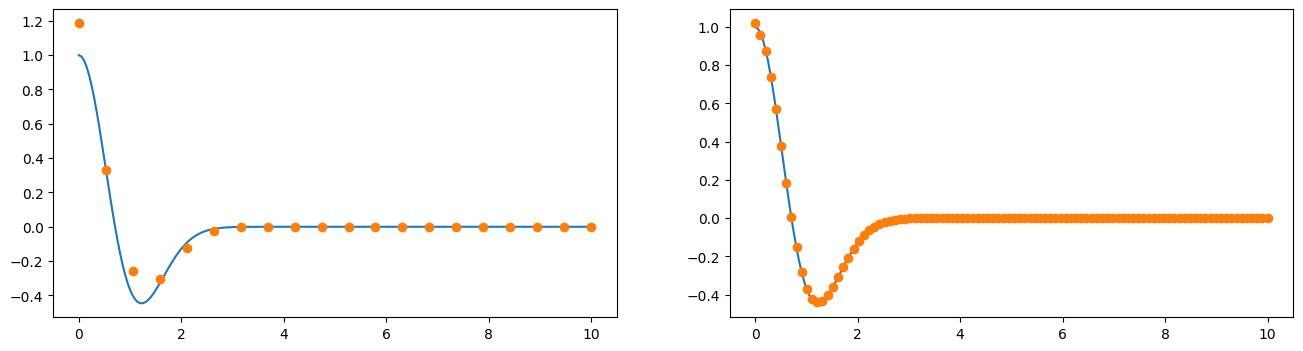

In [5]:
dx1 = x1[1] - x1[0]
dx2 = x2[1] - x2[0]

d_dx1 = FinDiff(0, dx1, acc=2)
d_dx2 = FinDiff(0, dx2)

df_dx1 = d_dx1(f1)
df_dx2 = d_dx2(f2)
df_dx_exact = df_dx(x_fine)

fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(x_fine, df_dx_exact)
ax2.plot(x_fine, df_dx_exact)
ax1.plot(x1, df_dx1, 'o')
ax2.plot(x2, df_dx2, 'o')
plt.show()

We get a big error in the range $x<3$ when we calculate the numerical derivative for the coarse grid. On the other hand, with the finer grid, we cover the function well on the whole domain, so the error for the derivative is small. But for $x>3$ we waste a lot of grid points, because the function is boring there. Consequently, we waste computational power. What we can do is either use the coarse grid and increase the accuracy order, or, we can use a _**non-uniform**_ grid.

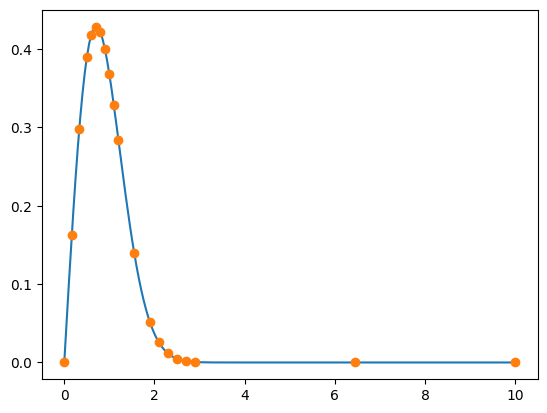

In [6]:
x_nu = np.r_[np.linspace(0, 0.5, 3, endpoint=False), np.linspace(0.5, 1.2, 7, endpoint=False),              
             np.linspace(1.2, 1.9, 2, endpoint=False), np.linspace(1.9, 2.9, 5, endpoint=False), 
             np.linspace(2.9, 10, 3)]
f_nu = f(x_nu)
plt.plot(x_fine, f_fine)
plt.plot(x_nu, f_nu, 'o')
plt.show()

Note that we have chosen the same number of points (20), but such that the density is higher where the curvature is higher. Now we calculate the derivative with the non-uniform grid.

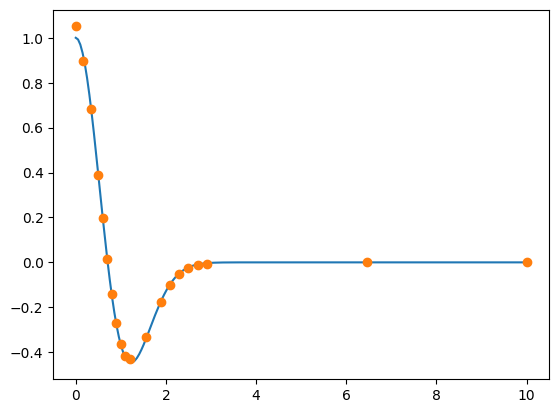

In [8]:
d_dx = FinDiff(0, x_nu, acc=2)
df_dx_nu = d_dx(f_nu)

plt.plot(x_fine, df_dx_exact)
plt.plot(x_nu, df_dx_nu, 'o')
plt.show()

And the error is much smaller. :-)